# Лабораторная работа: Геометрические алгоритмы в 2D


## Часть 1: Попадание точки в круг и треугольник

### Задание: Проверка геометрических положений

Реализуйте классы **Point**, **Circle** и **Triangle** для проверки попадания точки в круг и треугольник, аналогично лекции 9.

**Класс Point** хранит координаты `x, y` с методом `__str__`.

**Класс Circle** содержит центр (`Point`) и радиус, с методом для проверки `point_in_circle(point)`.

**Класс Triangle** содержит три вершины (`Point`), с методом `point_in_triangle(point)` на основе векторного произведения (barycentric coordinates).

**Генератор случайных точек** внутри ограничивающего прямоугольника, содержащего фигуры:

Создайте генератор `generate_points(xmin, xmax, ymin, ymax, n)`, который случайно создаёт `n` точек с координатами в данном диапазоне.

**Проверку** для всех сгенерированных точек попадания в круг и треугольник.

**Визуализацию** с помощью matplotlib:

- Отобразите круг и треугольник.
- Отметьте **зелёным** цветом точки, попавшие внутрь фигуры, **красным** — вне.
- Используйте различные маркеры для точек в круге и в треугольнике для наглядности.


In [22]:
import random
import math
import matplotlib.pyplot as plt

EPS = 1e-9

class Point:
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)

    def __str__(self):
        return f"({self.x:.2f}, {self.y:.2f})"


class Circle:
    def __init__(self, center, radius):
        self.center = center
        self.radius = float(radius)

    def point_in_circle(self, p):
        dx = p.x - self.center.x
        dy = p.y - self.center.y
        return dx*dx + dy*dy <= self.radius*self.radius + EPS


class Triangle:
    def __init__(self, a, b, c):
        self.a, self.b, self.c = a, b, c

    def point_in_triangle(self, p):
        ax, ay = self.a.x, self.a.y
        bx, by = self.b.x, self.b.y
        cx, cy = self.c.x, self.c.y
        px, py = p.x, p.y

        v0x, v0y = cx-ax, cy-ay
        v1x, v1y = bx-ax, by-ay
        v2x, v2y = px-ax, py-ay

        den = v0x*v1y - v1x*v0y
        if abs(den) < EPS:
            return False

        u = (v2x*v1y - v1x*v2y) / den
        v = (v0x*v2y - v2x*v0y) / den
        return (u >= -EPS) and (v >= -EPS) and (u+v <= 1+EPS)


def generate_points(xmin, xmax, ymin, ymax, n):
    return [Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax)) for _ in range(n)]


def run_part1():
    circle = Circle(Point(0, 0), 5)
    tri = Triangle(Point(-3, -2), Point(4, -1), Point(1, 4))
    pts = generate_points(-6, 6, -6, 6, 300)

    cir_x, cir_y = [], []
    tri_x, tri_y = [], []
    out_x, out_y = [], []

    for p in pts:
        inc = circle.point_in_circle(p)
        intr = tri.point_in_triangle(p)
        if inc:
            cir_x.append(p.x); cir_y.append(p.y)
        if intr:
            tri_x.append(p.x); tri_y.append(p.y)
        if not inc and not intr:
            out_x.append(p.x); out_y.append(p.y)

    t = [2*math.pi*i/360 for i in range(361)]
    cx = [circle.center.x + circle.radius*math.cos(a) for a in t]
    cy = [circle.center.y + circle.radius*math.sin(a) for a in t]

    plt.figure(figsize=(6,6))
    plt.plot(cx, cy, label="Circle")
    plt.plot([tri.a.x, tri.b.x, tri.c.x, tri.a.x],
             [tri.a.y, tri.b.y, tri.c.y, tri.a.y], label="Triangle")

    plt.scatter(cir_x, cir_y, c="green", s=18, marker="o", label="Inside circle")
    plt.scatter(tri_x, tri_y, c="green", s=18, marker="^", label="Inside triangle")
    plt.scatter(out_x, out_y, c="red", s=14, marker="x", label="Outside")

    plt.grid(True)
    plt.axis("equal")
    plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
    plt.title("Part 1")
    plt.show()

## Часть 2: Пересечение отрезков и окружностей

### Задание: Алгоритмы геометрического пересечения

Расширьте систему классов из Части 1 для проверки пересечения отрезков с окружностями и отрезков между собой.

**Класс Segment** содержит две вершины (`Point` A и B), с методами:
- `__str__` для отображения отрезка
- `length()` — вычисление длины отрезка
- `intersects_circle(circle)` — проверка пересечения отрезка с окружностью (возвращает список точек пересечения или пустой список)
- `intersects_segment(other)` — проверка пересечения двух отрезков (возвращает точку пересечения или None)

**Реализация алгоритмов пересечения:**
- **Отрезок ↔ Окружность**: Решение квадратного уравнения для расстояния от центра окружности до отрезка 
- **Отрезок ↔ Отрезок**: Метод на основе векторного произведения и параметризации (ориентация точек) 

**Генератор тестовых конфигураций:**
- `generate_segments(n, xmin, xmax, ymin, ymax)` — генератор n случайных отрезков в прямоугольнике
- Создайте несколько тестовых окружностей и отобразите все возможные случаи пересечения

**Визуализация с помощью matplotlib:**
- Отобразите окружность(и) и множество отрезков
- **Зелёные отрезки** — пересекают окружность (отметьте точки пересечения)
- **Синие отрезки** — полностью внутри окружности
- **Красные отрезки** — полностью вне окружности  
- **Жёлтые точки** — точки пересечения отрезков между собой
- Используйте легенду и сетку для наглядности


In [18]:
class Segment:
    def __init__(self, a, b):
        self.a, self.b = a, b

    def __str__(self):
        return f"{self.a} -> {self.b}"

    def length(self):
        return math.hypot(self.b.x - self.a.x, self.b.y - self.a.y)

    def intersects_circle(self, circle):
        ax, ay = self.a.x, self.a.y
        bx, by = self.b.x, self.b.y
        cx, cy = circle.center.x, circle.center.y
        r = circle.radius

        dx, dy = bx-ax, by-ay
        fx, fy = ax-cx, ay-cy

        A = dx*dx + dy*dy
        if A < EPS:
            # отрезок-точка
            return [Point(ax, ay)] if fx*fx + fy*fy <= r*r + EPS else []

        B = 2*(fx*dx + fy*dy)
        C = fx*fx + fy*fy - r*r

        D = B*B - 4*A*C
        if D < -EPS:
            return []

        pts = []
        if abs(D) <= EPS:
            t = (-B) / (2*A)
            if 0 <= t <= 1:
                pts.append(Point(ax + t*dx, ay + t*dy))
            return pts

        sqrtD = math.sqrt(D)
        for t in [(-B - sqrtD)/(2*A), (-B + sqrtD)/(2*A)]:
            if 0 <= t <= 1:
                pts.append(Point(ax + t*dx, ay + t*dy))

        # дедупликация (на случай почти-касания)
        if len(pts) == 2:
            if (pts[0].x-pts[1].x)**2 + (pts[0].y-pts[1].y)**2 < 1e-18:
                pts = [pts[0]]
        return pts


    def intersects_segment(self, other):
        def cross(ax, ay, bx, by):
            return ax*by - ay*bx

        r_x = self.b.x - self.a.x
        r_y = self.b.y - self.a.y
        s_x = other.b.x - other.a.x
        s_y = other.b.y - other.a.y

        denom = cross(r_x, r_y, s_x, s_y)
        if abs(denom) < EPS:
            return None

        qp_x = other.a.x - self.a.x
        qp_y = other.a.y - self.a.y

        t = cross(qp_x, qp_y, s_x, s_y) / denom
        u = cross(qp_x, qp_y, r_x, r_y) / denom

        if 0 <= t <= 1 and 0 <= u <= 1:
            return Point(self.a.x + t*r_x, self.a.y + t*r_y)
        return None


def generate_segments(n, xmin, xmax, ymin, ymax):
    segs = []
    for _ in range(n):
        a = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        b = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        segs.append(Segment(a, b))
    return segs


def run_part2():
    circles = [Circle(Point(0,0), 4), Circle(Point(6,2), 2.5)]
    main_circle = circles[0]
    segs = generate_segments(25, -2, 10, -4, 8)

    green, blue, red = [], [], []
    circle_pts = []
    seg_pts = []

    for s in segs:
        pts = s.intersects_circle(main_circle)
        a_in = main_circle.point_in_circle(s.a)
        b_in = main_circle.point_in_circle(s.b)

        if pts:
            green.append(s)
            circle_pts += pts
        elif a_in and b_in:
            blue.append(s)
        else:
            red.append(s)

    for i in range(len(segs)):
        for j in range(i+1, len(segs)):
            p = segs[i].intersects_segment(segs[j])
            if p:
                if not any((p.x-q.x)**2 + (p.y-q.y)**2 < 1e-18 for q in seg_pts):
                    seg_pts.append(p)


    plt.figure(figsize=(9,7))

    t = [2*math.pi*i/360 for i in range(361)]
    for i, c in enumerate(circles, 1):
        xs = [c.center.x + c.radius*math.cos(a) for a in t]
        ys = [c.center.y + c.radius*math.sin(a) for a in t]
        plt.plot(xs, ys, label=f"Circle {i}")

    for s in green:
        plt.plot([s.a.x, s.b.x], [s.a.y, s.b.y], color="green", linewidth=2)
    for s in blue:
        plt.plot([s.a.x, s.b.x], [s.a.y, s.b.y], color="blue", linewidth=2)
    for s in red:
        plt.plot([s.a.x, s.b.x], [s.a.y, s.b.y], color="red", linewidth=1.8)

    if circle_pts:
        plt.scatter([p.x for p in circle_pts], [p.y for p in circle_pts],
                    c="black", s=30, label="Segment-circle points")
    if seg_pts:
        plt.scatter([p.x for p in seg_pts], [p.y for p in seg_pts],
                    c="yellow", edgecolors="black", s=50, label="Segment-segment points")

    plt.plot([], [], color="green", linewidth=2, label="Green: intersects circle")
    plt.plot([], [], color="blue", linewidth=2, label="Blue: inside circle")
    plt.plot([], [], color="red", linewidth=2, label="Red: outside circle")

    plt.grid(True)
    plt.axis("equal")
    plt.legend()
    plt.title("Part 2")
    plt.show()

## Часть 3: Формула Гаусса для площади многоугольника

### Задание: Вычисление площади произвольных многоугольников

Реализуйте класс **Polygon** для работы с многоугольниками и вычисления их площади по формуле Гаусса (шнуровки).

**Класс Polygon** содержит список вершин (`List[Point]`), с методами:
- `__init__(vertices: List[Point])` — конструктор (проверка на самопересечение опционально)
- `__str__()` — отображение координат вершин
- `area()` — вычисление площади по формуле Гаусса:  
  $S = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right| $,  
  где по соглашению \( (x_{n+1}, y_{n+1}) = (x_1, y_1) \).
- `is_convex()` — проверка выпуклости многоугольника
- `centroid()` — вычисление центра масс (средневзвешенных координат)




**Генератор многоугольников:**
- `generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8)` — генератор n случайных выпуклых/вогнутых многоугольников
- `generate_regular_polygon(sides, center, radius)` — правильный многоугольник

**Визуализация с помощью matplotlib:**
- Отобразите несколько многоугольников разных форм
- **Заливка** пропорциональна площади (alpha=0.5, разные цвета)
- **Подписи** с точной площадью рядом с каждым многоугольником
- **Сравнение** с площадью по разбиению на треугольники (для проверки)
- **Легенда** с площадями и типом (выпуклый/вогнутый)


In [20]:
class Polygon:
    def __init__(self, vertices):
        self.vertices = vertices

    def __str__(self):
        return " -> ".join(str(v) for v in self.vertices)

    def area(self):
        s = 0.0
        n = len(self.vertices)
        for i in range(n):
            x1, y1 = self.vertices[i].x, self.vertices[i].y
            x2, y2 = self.vertices[(i+1) % n].x, self.vertices[(i+1) % n].y
            s += x1*y2 - x2*y1
        return abs(s) / 2.0

    def centroid(self):
        s = 0.0
        cx = 0.0
        cy = 0.0
        n = len(self.vertices)
        for i in range(n):
            x1, y1 = self.vertices[i].x, self.vertices[i].y
            x2, y2 = self.vertices[(i+1) % n].x, self.vertices[(i+1) % n].y
            a = x1*y2 - x2*y1
            s += a
            cx += (x1 + x2) * a
            cy += (y1 + y2) * a
        if abs(s) < EPS:
            return Point(sum(v.x for v in self.vertices)/n, sum(v.y for v in self.vertices)/n)
        cx /= (3*s)
        cy /= (3*s)
        return Point(cx, cy)

    def is_convex(self):
        n = len(self.vertices)
        if n < 4:
            return True
        sign = 0
        for i in range(n):
            p0 = self.vertices[i]
            p1 = self.vertices[(i+1) % n]
            p2 = self.vertices[(i+2) % n]
            z = (p1.x-p0.x)*(p2.y-p1.y) - (p1.y-p0.y)*(p2.x-p1.x)
            if abs(z) < EPS:
                continue
            cur = 1 if z > 0 else -1
            if sign == 0:
                sign = cur
            elif cur != sign:
                return False
        return True

def generate_regular_polygon(sides, center, radius):
    verts = []
    for i in range(sides):
        ang = 2*math.pi*i/sides
        verts.append(Point(center.x + radius*math.cos(ang),
                           center.y + radius*math.sin(ang)))
    return Polygon(verts)


def generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8):
    polys = []
    for _ in range(n):
        sides = random.randint(min_sides, max_sides)
        center = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        base_r = random.uniform(0.8, 2.5)
        angles = sorted([random.uniform(0, 2*math.pi) for _ in range(sides)])

        verts = []
        for a in angles:
            r = base_r * random.uniform(0.5, 1.3)
            verts.append(Point(center.x + r*math.cos(a), center.y + r*math.sin(a)))

        polys.append(Polygon(verts))
    return polys

def area_triangulation(poly):
    v = poly.vertices
    p0 = v[0]
    s = 0.0
    for i in range(1, len(v)-1):
        a = v[i]; b = v[i+1]
        s += abs((a.x-p0.x)*(b.y-p0.y) - (a.y-p0.y)*(b.x-p0.x)) / 2.0
    return s

def run_part3():
    polys = [
        generate_regular_polygon(5, Point(0, 0), 3.0),
        generate_regular_polygon(7, Point(7, 0), 2.2),
    ] + generate_polygons(4, -2, 10, -2, 8)

    areas = [p.area() for p in polys]
    maxA = max(areas) if areas else 1.0
    minA = min(areas) if areas else 0.0

    def fill_color_by_area(A):
        # alpha фиксированный (0.5), а "пропорциональность" делаем яркостью заливки:
        # маленькая площадь -> более светлый, большая -> более насыщенный.
        # t in [0..1]
        t = 0.0 if abs(maxA - minA) < EPS else (A - minA) / (maxA - minA)
        # базовый цвет (можешь поменять, но не обязательно)
        base = (0.2, 0.6, 0.9)  # RGB
        # смешиваем с белым: t=0 -> почти белый, t=1 -> base
        k = 0.25 + 0.75 * t
        r = 1.0 * (1 - k) + base[0] * k
        g = 1.0 * (1 - k) + base[1] * k
        b = 1.0 * (1 - k) + base[2] * k
        return (r, g, b)

    plt.figure(figsize=(9, 7))

    # Легенда: чтобы не дублировать, будем добавлять элементы один раз
    legend_added_convex = False
    legend_added_concave = False
    legend_added_area_check = False

    for poly, A in zip(polys, areas):
        xs = [p.x for p in poly.vertices] + [poly.vertices[0].x]
        ys = [p.y for p in poly.vertices] + [poly.vertices[0].y]

        c = poly.centroid()
        is_cvx = poly.is_convex()

        # --- заливка пропорциональна площади (alpha=0.5 строго) ---
        fc = fill_color_by_area(A)
        plt.fill(xs, ys, alpha=0.5, color=fc)

        # контур
        plt.plot(xs, ys, marker="o", linewidth=2)

        # --- подпись точной площади рядом с многоугольником ---
        plt.text(c.x, c.y, f"S={A:.2f}", fontsize=10, ha="center", va="center")

        # --- сравнение с триангуляцией (проверка) ---
        At = area_triangulation(poly)  # считаем для всех (для вогнутых может отличаться — это тоже показатель)
        diff = abs(A - At)

        # для отчёта удобно выводить в консоль
        print(f"Polygon: {'convex' if is_cvx else 'concave'} | "
              f"Gauss={A:.4f} | Triang={At:.4f} | diff={diff:.4e}")

        # --- легенда: тип ---
        if is_cvx and not legend_added_convex:
            plt.plot([], [], label="тип: выпуклый", linewidth=0)
            legend_added_convex = True
        if (not is_cvx) and not legend_added_concave:
            plt.plot([], [], label="тип: вогнутый", linewidth=0)
            legend_added_concave = True

    # Легенда для "заливка ~ площади"
    # (объясняем смысл: чем темнее заливка, тем больше площадь)
    plt.fill([], [], alpha=0.5, color=fill_color_by_area(maxA), label="заливка темнее = площадь больше")

    plt.grid(True)
    plt.axis("equal")
    plt.title("Part 3: Gauss area + convexity + triangulation check")
    plt.legend()
    plt.show()


# Прикладная задача
## Оценка площади озера по спутниковому снимку 

По результатам сегментации спутникового изображения береговая линия озера аппроксимирована многоугольником с вершинами в пиксельных координатах. Известно пространственное разрешение снимка (например, 1 пиксель = 2 м по обеим осям).

### Задача
- Перевести координаты вершин из пикселей в метры, умножив каждую координату на масштаб:  
  $x'_i = s_x * x_i,  y'_i = s_y * y_i$  (для квадратного пикселя s_x = s_y = s).
- С помощью формулы Гаусса вычислить площадь озера в квадратных метрах и гектарах:  
  $S = 1/2 * | Σ_{i=1}^{n} (x'_i y'_{i+1} - x'_{i+1} y'_i) |, где (x'_{n+1}, y'_{n+1}) = (x'_1, y'_1)$; затем S_га = S / 10 000.
- Сравнить полученную площадь с заданным порогом (например, 10 гектаров), чтобы классифицировать объект как «малое озеро» или «крупный водоём».


## Чтобы узнать вариант введите ваш номер в списке

In [1]:
print(int(input("Введите номер в списке: "))%6)

3


## Вариант 1: Озеро в Карелии (малый водоём)

**Название объекта:** Озеро Малое Круглое  
**Местоположение:** Республика Карелия  

**Координаты береговой линии (пиксели на снимке):**

[
(145, 87), (162, 76), (188, 81), (201, 94),
(208, 112), (194, 128), (172, 135), (151, 130),
(133, 117), (126, 101), (129, 89)
]

**Пространственное разрешение:** 1 пиксель = 1.5 метра  
**Порог классификации:** 5 гектаров (для малых озёр)  

---
## Вариант 2: Старица реки Волги

**Название объекта:** Старица "Подкова"  
**Местоположение:** Волго-Ахтубинская пойма, Астраханская область  

**Координаты (пиксели):**

[
(320, 180), (340, 165), (370, 160), (400, 165),
(420, 180), (435, 200), (440, 225), (430, 250),
(410, 265), (380, 270), (350, 260), (330, 240),
(315, 220), (310, 200)
]

**Пространственное разрешение:** 1 пиксель = 2.0 метра  
**Порог классификации:** 8 гектаров  

---

## Вариант 3: Городской пруд (искусственный водоём)

**Название объекта:** Парковый пруд "Зеркальный"  
**Местоположение:** Городской парк, Москва  

**Координаты (пиксели):**

[
(80, 120), (110, 100), (150, 95), (190, 105),
(220, 125), (235, 155), (220, 185), (190, 205),
(150, 210), (110, 200), (80, 180), (65, 150)
]

**Пространственное разрешение:** 1 пиксель = 0.5 метра (высокое разрешение)  
**Порог классификации:** 2 гектара (для городских объектов)  

---

## Вариант 4: Альпийское ледниковое озеро

**Название объекта:** Ледниковое озеро "Голубое"  
**Местоположение:** Кавказские горы, высота 2800 м  

**Координаты (пиксели):**

[
(50, 70), (85, 55), (125, 50), (165, 60),
(195, 80), (210, 110), (200, 145), (170, 170),
(130, 180), (90, 170), (60, 150), (40, 120),
(35, 95)
]

**Пространственное разрешение:** 1 пиксель = 4.0 метра (низкое разрешение горной съёмки)  
**Порог классификации:** 15 гектаров (горные озёра)  

---

## Вариант 5: Водохранилище на малой реке

**Название объекта:** Водохранилище "Приозерное"  
**Местоположение:** Смоленская область  

**Координаты (пиксели):**

[
(200, 100), (250, 80), (310, 85), (360, 105),
(400, 140), (420, 185), (405, 230), (360, 260),
(300, 270), (240, 250), (200, 220), (180, 180),
(175, 140), (185, 115)
]

**Пространственное разрешение:** 1 пиксель = 3.0 метра  
**Порог классификации:** 20 гектаров (водохранилища)  

---

## Вариант 6: Техногенный карьер, заполненный водой

**Название объекта:** Затопленный карьер "Северный"  
**Местоположение:** Кемеровская область, бывший угольный разрез  

**Координаты (пиксели):**

[
(90, 60), (130, 40), (180, 35), (230, 45),
(270, 70), (295, 105), (300, 145), (285, 185),
(250, 215), (200, 225), (150, 210), (110, 180),
(85, 140), (80, 100)
]

**Пространственное разрешение:** 1 пиксель = 2.5 метра  
**Порог классификации:** 10 гектаров (техногенные объекты)  


In [11]:
def run_lake():
    pixels = [
        (80,120),(110,100),(150,95),(190,105),(220,125),
        (235,155),(220,185),(190,205),(150,210),(110,200),
        (80,180),(65,150)
    ]
    scale = 0.5
    threshold = 2.0

    pts = [Point(x*scale, y*scale) for x, y in pixels]
    pond = Polygon(pts)

    area_m2 = pond.area()
    area_ha = area_m2 / 10000

    print(f"Площадь: {area_m2:.2f} м²")
    print(f"Площадь: {area_ha:.3f} га")
    print("Классификация:", "малое озеро" if area_ha < threshold else "крупный водоём")

    xs = [p.x for p in pts] + [pts[0].x]
    ys = [p.y for p in pts] + [pts[0].y]

    plt.figure(figsize=(5,5))
    plt.fill(xs, ys, alpha=0.5)
    plt.plot(xs, ys, marker="o")
    plt.title(f"Площадь: {area_ha:.3f} га")
    plt.axis("equal")
    plt.grid(True)
    plt.show()

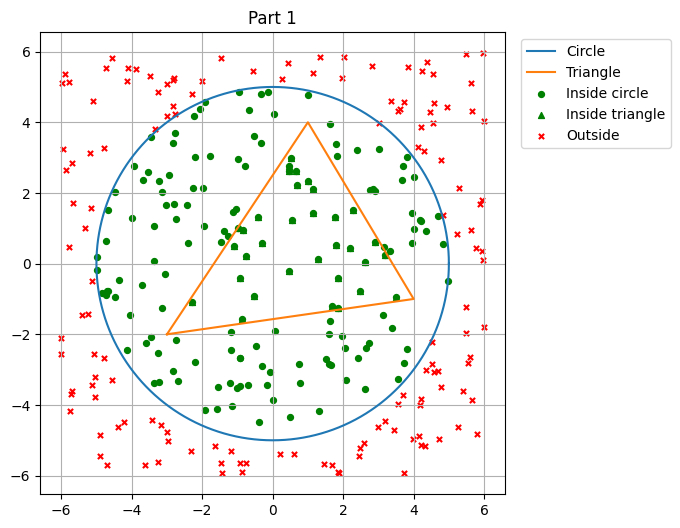

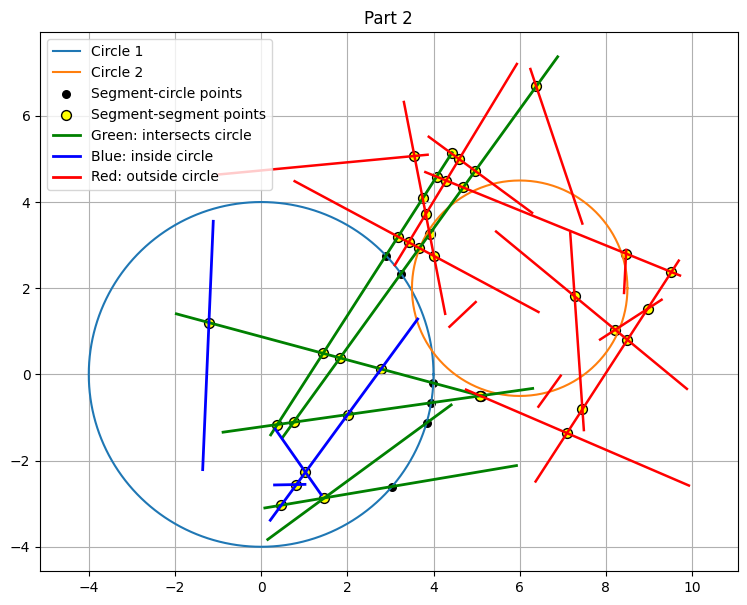

Polygon: convex | Gauss=21.3988 | Triang=21.3988 | diff=0.0000e+00
Polygon: convex | Gauss=13.2442 | Triang=13.2442 | diff=5.3291e-15
Polygon: concave | Gauss=2.4106 | Triang=2.4106 | diff=4.4409e-16
Polygon: convex | Gauss=0.9508 | Triang=0.9508 | diff=4.4409e-16
Polygon: concave | Gauss=2.2691 | Triang=2.2691 | diff=1.3323e-15
Polygon: convex | Gauss=1.6821 | Triang=1.6821 | diff=0.0000e+00


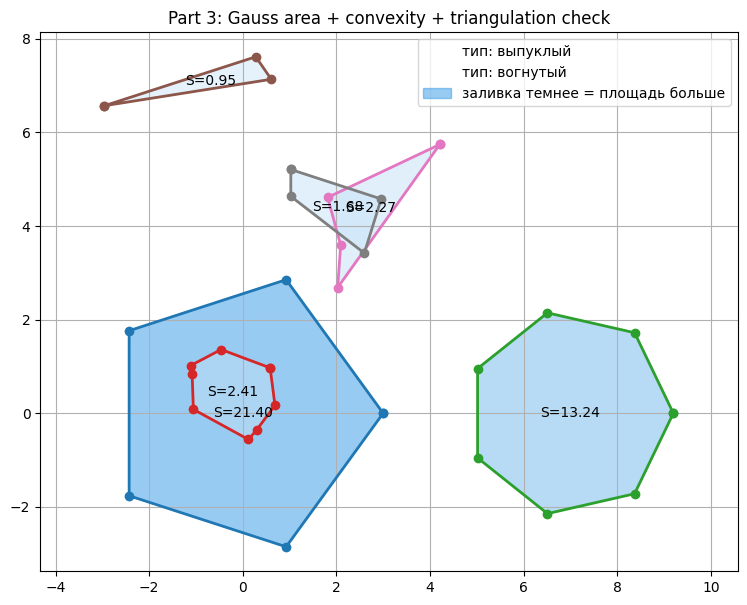

Площадь: 3575.00 м²
Площадь: 0.357 га
Классификация: малое озеро


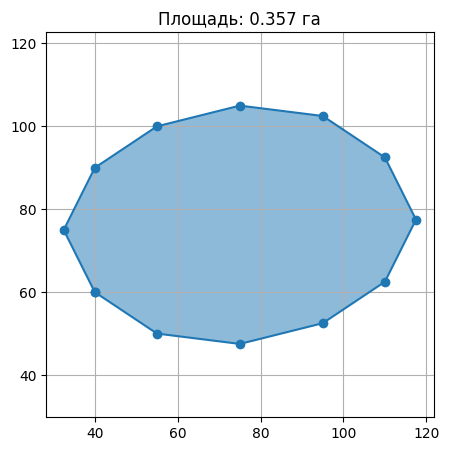

In [23]:
if __name__ == "__main__":
    random.seed(42)
    run_part1()
    run_part2()
    run_part3()
    run_lake()